In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from matplotlib.image import imread

def make_hello(N=100, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(.5, .4, 'HELLO', va='center', ha='center', weight='bold', size=75)
    fig.savefig('hello.png')
    plt.close(fig)
    
    data = imread('hello.png')[::-1, : , 0].T
    rng = np.random.RandomState(rseed)
    x = rng.rand(4 * N, 2)
    i, j = (x * data.shape).astype(int).T
    mask = (data[i, j] < 1) 
    x = x[mask]
    x[:, 0] *= (data.shape[0] / data.shape[1])
    x = x[:N]
    return x[np.argsort(x[:, 0])]

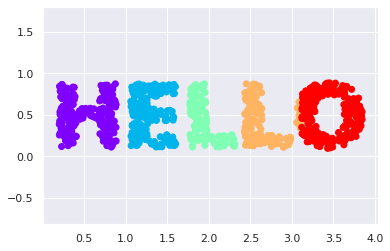

In [3]:
x = make_hello(1000)
colorize  = dict(c=x[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(x[:, 0], x[:, 1], **colorize)
plt.axis('equal');

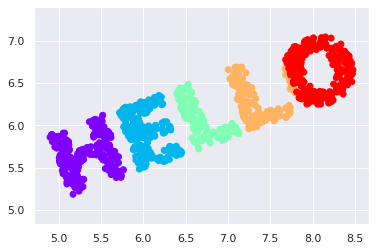

In [4]:
def rotate(x, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(x, R)

x2 = rotate(x, 20) + 5
plt.scatter(x2[:, 0], x2[:, 1], **colorize)
plt.axis('equal');

In [5]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(x)
D.shape

(1000, 1000)

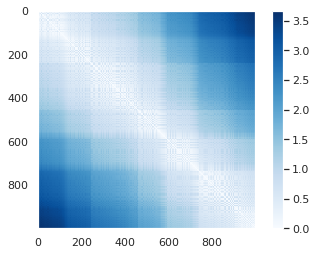

In [6]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [7]:
D2 = pairwise_distances(x2)
np.allclose(D, D2)

True

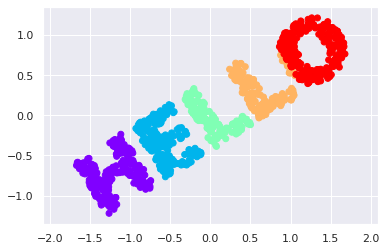

In [8]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [9]:
def random_projection(x, dimension=3, rseed=42):
    assert dimension >= x.shape[1]
    rng = np.random.RandomState(rseed)
    c = rng.randn(dimension, dimension)
    e, v = np.linalg.eigh(np.dot(c, c.T))
    return np.dot(x, v[:x.shape[1]])

In [10]:
x3 = random_projection(x, 3)
x3.shape

(1000, 3)

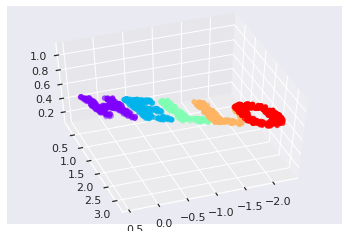

In [11]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(x3[:, 0], x3[:, 1], x3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

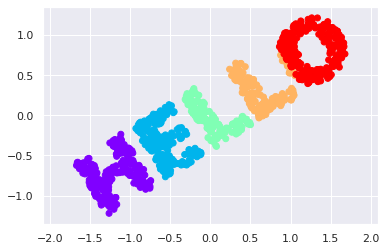

In [12]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(x3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [13]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * .75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

xs = make_hello_s_curve(x)

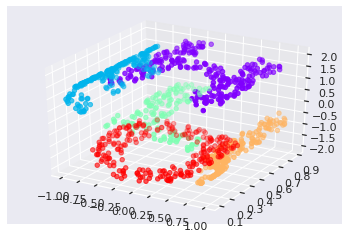

In [14]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(xs[:, 0], xs[:, 1], xs[:, 2], **colorize);

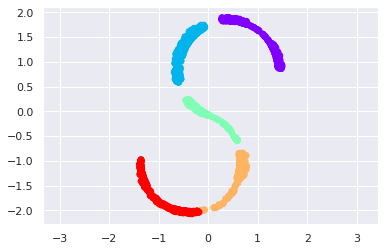

In [15]:
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(xs)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

In [16]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2,
                              method='modified', eigen_solver='dense')
out = model.fit_transform(xs)

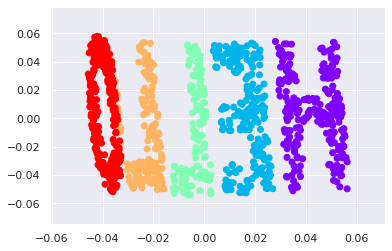

In [17]:
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)